In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [8]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
queries = session.query(func.max(measurement.date)).first()
queries


('2017-08-23',)

In [25]:
print(dt.datetime(2017,8,23) - dt.timedelta(365))

2016-08-23 00:00:00


<AxesSubplot:xlabel='date'>

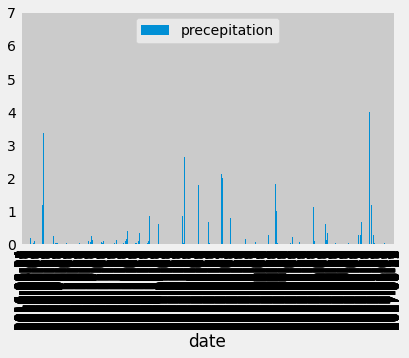

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime(2017, 8, 23) - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
last_year_query = session.query(measurement.date, measurement.prcp).filter(measurement.date > last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_year_query, columns=["date", "precepitation"])

# Sort the dataframe by date
df.sort_values(by=["date"], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar("date", "precepitation", rot=90)



In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precepitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [42]:
# Design a query to calculate the total number stations in the dataset
count = session.query(station).count()
print(count)

9


In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(station_count)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).filter(measurement.station == station_count[0][0]).all()
station_df = pd.DataFrame(active_station, columns=["stations", "date", "prcp", "tobs"])
station_df["tobs"].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

<AxesSubplot:ylabel='Frequency'>

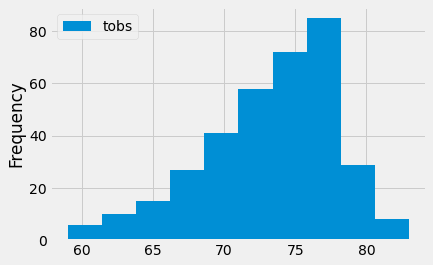

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_count = session.query(measurement.tobs).filter(measurement.station == station_count[0][0]).filter(measurement.date > last_year).all()
temp_df = pd.DataFrame(temp_count, columns=["tobs"])
temp_df.plot.hist(by='tobs')

# Close session

In [73]:
# Close Session
session.close()